In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CSV_DATA="s_modexp_250105.txt"

In [3]:
columns=["block","transaction","base_len","exp_len","mod_len"]

In [4]:
df = pd.read_csv(CSV_DATA, names=columns)

In [5]:
pd.set_option('display.max_colwidth', None)

# MODEXP Calls Analysis

The following dataset contains the log of all calls to `MODEXP` opcode, since introduced in the Byzantium Hard Fork.

First `MODEXP` call found at block `5472266` (April 20, 2018), until the end of the tracing at block `21550926` (January 4th, 2025):

In [6]:
df

,block,transaction,base_len,exp_len,mod_len
0,5472266,0xd6a33837bd441e4639f8fef24ce4f5502aca7e33c31fba9111591c59fddc8d82,0.0,0.0,0.0
1,6153833,0xb5d873f01c0d14de16207c5cf2d63a85b6fd6b8b05b24e91b323555b6a937ce0,0.0,0.0,0.0
2,6245529,0x76354bbec0a2efe1fabbd479b215c8ac0db0b65e092eceddd7f20eb560bd1807,128.0,3.0,128.0
3,6245529,0x76354bbec0a2efe1fabbd479b215c8ac0db0b65e092eceddd7f20eb560bd1807,256.0,3.0,256.0
4,6245933,0xc9e90e8eb6d5252afc134c65dca7cbbde61de7fcb99fc95d09c63db2e0f520c3,128.0,3.0,128.0
...,...,...,...,...,...
2447233,21550909,0x18cec987ba6e44a721f17aa8c9874825e1ca01530b76c4ac818685f9b60ca8f3,32.0,32.0,32.0
2447234,21550913,0x06257445e61531c77e512436620445124ae0dcc955db7e02561f9c258396e120,32.0,32.0,32.0
2447235,21550922,0x501681652742008067d92baeebfc1a5712c03ae752e9ba7b7b1fba45adf50fe7,32.0,32.0,32.0
2447236,21550923,0xaf04dfab7a512a4b2d36475f987fa9255c3adcfe9d67fe8840b4f89c7304f9cb,32.0,32.0,32.0


## Base Length

The following table shows the different base lengths in bytes as well as how frequently they are used during `MODEXP` call:

In [7]:
pd.DataFrame(df['base_len'].value_counts(), columns=['count'])

,count
base_len,
32.0,2439595
128.0,4167
256.0,2969
160.0,436
512.0,36
0.0,13
64.0,7
78.0,2
513.0,2


## Exponent Length 

Different Exponent Lengths in bytes and how frequently they are used during `MODEXP` calls:

In [8]:
pd.DataFrame(df['exp_len'].value_counts(), columns=['count'])

,count
exp_len,
32.0,2442255
3.0,4771
1.0,159
128.0,29
0.0,13
5.0,2


## Modulo length

Different Modulo lengths in bytes and how frequently they are used during `MODEXP` calls:

In [9]:
pd.DataFrame(df['mod_len'].value_counts(), columns=['count'])

,count
mod_len,
32.0,2439594
128.0,4167
256.0,2968
160.0,436
512.0,38
0.0,13
64.0,8
78.0,2
129.0,1


## Transactions calling MODEXP precompile directly

During the trace a total of 9 transactions calling the MODEXP precompile directly using invalid inputs were found, all of them containing empty inputs or values attempting to execute a contract function by its 4byte signature:

In [10]:
df[df.isna().any(axis=1)].shape[0]

9

In [11]:
df[df.isna().any(axis=1)]

,block,transaction,base_len,exp_len,mod_len
1044,10160488,0x391016ea2cf763c6a7fbbb16d0d11741400e88c45291c9287ea3d609cad0242b,NaN,NaN,NaN
182115,13224456,0x964b2cafd565434d65a0cd5c11c31dad0f5d53aa24219afaa47968778ae5e025,NaN,NaN,NaN
182119,13224466,0x2914bf385180677c7f2fd8ca90e37cbe67d37463bee99e7d0b6cea1f5f235e6e,NaN,NaN,NaN
182120,13224470,0x053b42ec2cba7b2f5fe9598c2c09fbe60485bf075ba3d3e943090305adb77cbd,NaN,NaN,NaN
182121,13224484,0xdf4476216e551f1e1821b1346ea066aa288b69a16b48a22aa5543a7c6993d3a7,NaN,NaN,NaN
535092,15582983,0x1202de060c663f6633fdcb17cd378508c85a0803ce693da25e1d5c1a8f5d976c,NaN,NaN,NaN
823848,17541367,0x61bf8e3bce78f3c51cd23ca1b5edbd2a309041754c8178dba97682f671e026c5,NaN,NaN,NaN
823851,17541380,0xc42aa446112c9c3aab83bc01f9c583f49b8ab24e939f350cce7b7fe96be872fd,NaN,NaN,NaN
824157,17542480,0xfe1715c9a6b338f9d85646c0585e88dc1d07b97d55d9c81e2011fedb4a3fb599,NaN,NaN,NaN



- [0x964b2cafd565434d65a0cd5c11c31dad0f5d53aa24219afaa47968778ae5e025](https://etherscan.io/tx/0x964b2cafd565434d65a0cd5c11c31dad0f5d53aa24219afaa47968778ae5e025): Empty input
- [0x2914bf385180677c7f2fd8ca90e37cbe67d37463bee99e7d0b6cea1f5f235e6e](https://etherscan.io/tx/0x2914bf385180677c7f2fd8ca90e37cbe67d37463bee99e7d0b6cea1f5f235e6e): Empty input
- [0x053b42ec2cba7b2f5fe9598c2c09fbe60485bf075ba3d3e943090305adb77cbd](https://etherscan.io/tx/0x053b42ec2cba7b2f5fe9598c2c09fbe60485bf075ba3d3e943090305adb77cbd): Empty input
- [0xdf4476216e551f1e1821b1346ea066aa288b69a16b48a22aa5543a7c6993d3a7](https://etherscan.io/tx/0xdf4476216e551f1e1821b1346ea066aa288b69a16b48a22aa5543a7c6993d3a7): Empty input
- [0x1202de060c663f6633fdcb17cd378508c85a0803ce693da25e1d5c1a8f5d976c](https://etherscan.io/tx/0x1202de060c663f6633fdcb17cd378508c85a0803ce693da25e1d5c1a8f5d976c): Empty input
- [0x61bf8e3bce78f3c51cd23ca1b5edbd2a309041754c8178dba97682f671e026c5](https://etherscan.io/tx/0x61bf8e3bce78f3c51cd23ca1b5edbd2a309041754c8178dba97682f671e026c5): Input: `0x9e5faafc` (`attack()`)
- [0xc42aa446112c9c3aab83bc01f9c583f49b8ab24e939f350cce7b7fe96be872fd](https://etherscan.io/tx/0xc42aa446112c9c3aab83bc01f9c583f49b8ab24e939f350cce7b7fe96be872fd): Input: `0x9e5faafc` (`attack()`)
- [0xfe1715c9a6b338f9d85646c0585e88dc1d07b97d55d9c81e2011fedb4a3fb599](https://etherscan.io/tx/0xfe1715c9a6b338f9d85646c0585e88dc1d07b97d55d9c81e2011fedb4a3fb599): Input: `0x85474728` (`destroySmartContract()`)
- [0x391016ea2cf763c6a7fbbb16d0d11741400e88c45291c9287ea3d609cad0242b](https://etherscan.io/tx/0x391016ea2cf763c6a7fbbb16d0d11741400e88c45291c9287ea3d609cad0242b):


    ```
    0x9e281a98000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000021e19e0c9bab2400000
    ```

    If we split the input into values of 32 bytes we have:

    ```
    9e281a9800000000000000000000000000000000000000000000000000000000
    0000000000000000000000000000000000000000000000000000021e19e0c9ba
    b2400000
    ```

    Which does not correspond to a valid MODEXP input. 

    **Note**: The first 4 bytes prefix corresponds to `withdrawToken(address,uint256)`

## MODEXP Intput analysis

The file `inputs_data.txt` contains a data set of `~2M` inputs used during calls to the `MODEXP` precompile. This data was analyzed and a second file `inputs_data_zeop.txt` was generated containing information of the given input values, for example:

- `z`: Zero value
- `e`: Even
- `p`: Power of 2
- `o`: Odd

In [12]:
INPUTS_CSV="inputs_data_zeop.txt"
columns=["base", "exp", "mod", "base_ge_mod"]
i_df = pd.read_csv(INPUTS_CSV, names=columns, dtype={0:str, 1: str, 2:str, 3:str})

### Zero Inputs

Note there are only 3 calls to MODEXP using the value 0 for `Base` and `Mod`.
However, in the case of the exponent (`Exp`) a total of 646280 times the value `0` was used, representing the `2.3%`.

In [13]:
base_values = i_df['base'].value_counts()
exp_values = i_df['exp'].value_counts()
mod_values = i_df['mod'].value_counts()
print(base_values)
print(exp_values)
print(mod_values)

base
o    1326217
e    1004806
p        318
z          3
Name: count, dtype: int64
exp
e    915684
o    716011
p    646280
z     53369
Name: count, dtype: int64
mod
o    2331076
p        265
z          3
Name: count, dtype: int64


In [14]:
b_percentages = (base_values/base_values.sum()).mul(100).round(decimals=2)
e_percentages = (exp_values/exp_values.sum()).mul(100).round(decimals=2)
m_percentages = (mod_values/mod_values.sum()).mul(100).round(decimals=2)
print(b_percentages)
print(e_percentages)
print(m_percentages)

base
o    56.89
e    43.10
p     0.01
z     0.00
Name: count, dtype: float64
exp
e    39.28
o    30.71
p    27.72
z     2.29
Name: count, dtype: float64
mod
o    99.99
p     0.01
z     0.00
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x7fb97d452490>,
 [Text(0.3634934593129164, 1.038206388458831, 'Odd'),
  Text(-1.0536819118745153, -0.3158392448516595, 'Even'),
  Text(0.5806299294723889, -0.9342745233607137, 'Power of 2'),
  Text(1.0971545693687348, -0.07906864684125064, 'Zero')],
 [Text(0.1982691596252271, 0.5662943937048169, '39.3%'),
  Text(-0.5747355882951901, -0.1722759517372688, '30.7%'),
  Text(0.31670723425766667, -0.5096042854694801, '27.7%'),
  Text(0.5984479469284006, -0.04312835282250035, '2.3%')])

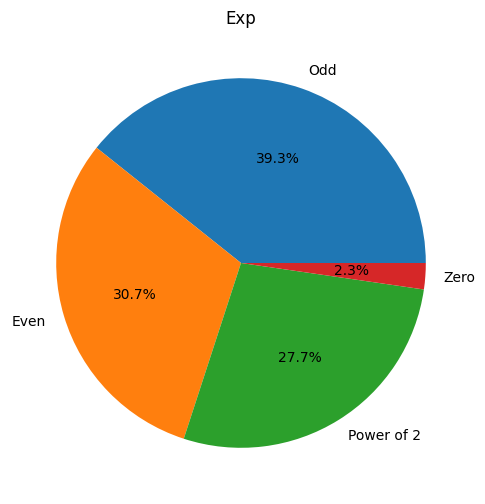

In [15]:
fig2, e_ax1 = plt.subplots(figsize=(6,6))
plt.title('Exp')
e_ax1.pie(x=e_percentages.values, labels=['Odd','Even', 'Power of 2', 'Zero'], autopct='%1.1f%%')

In [16]:
i_df = i_df[i_df['base'] != 'z']
i_df = i_df[i_df['mod'] != 'z']

### Powers of 2

According to the collected data, Power's of 2 values are often used for the exponent (`Exp`) parameter.

In [17]:
base_values = i_df['base'].value_counts()
exp_values = i_df['exp'].value_counts()
mod_values = i_df['mod'].value_counts()
print(base_values)
print(exp_values)
print(mod_values)

base
o    1326217
e    1004806
p        318
Name: count, dtype: int64
exp
e    915684
o    716011
p    646280
z     53366
Name: count, dtype: int64
mod
o    2331076
p        265
Name: count, dtype: int64


In [18]:
b_percentages = (base_values/base_values.sum()).mul(100).round(decimals=2)
e_percentages = (exp_values/exp_values.sum()).mul(100).round(decimals=2)
m_percentages = (mod_values/mod_values.sum()).mul(100).round(decimals=2)
print(b_percentages)
print(e_percentages)
print(m_percentages)

base
o    56.89
e    43.10
p     0.01
Name: count, dtype: float64
exp
e    39.28
o    30.71
p    27.72
z     2.29
Name: count, dtype: float64
mod
o    99.99
p     0.01
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x7fb993adf010>,
 [Text(0.3634934593129164, 1.038206388458831, 'Odd'),
  Text(-1.0536819118745153, -0.3158392448516595, 'Even'),
  Text(0.5806299294723889, -0.9342745233607137, 'Power of 2'),
  Text(1.0971545693687348, -0.07906864684125064, 'Zero')],
 [Text(0.1982691596252271, 0.5662943937048169, '39.3%'),
  Text(-0.5747355882951901, -0.1722759517372688, '30.7%'),
  Text(0.31670723425766667, -0.5096042854694801, '27.7%'),
  Text(0.5984479469284006, -0.04312835282250035, '2.3%')])

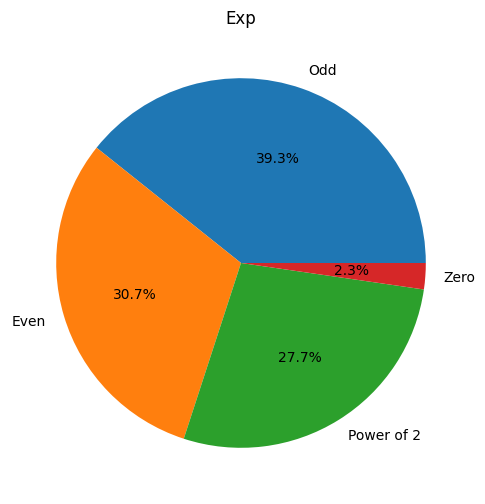

In [19]:
fig2, e_ax1 = plt.subplots(figsize=(6,6))
plt.title('Exp')
e_ax1.pie(x=e_percentages.values, labels=['Odd','Even', 'Power of 2', 'Zero'], autopct='%1.1f%%')

### Even vs Odd

In case of Modulus (`Mod`) **Odd** values are the most frequently used (`99.99%` according to the collected data).

In [20]:
i_df_oe = i_df
i_df_oe.loc[i_df_oe['base'] == 'p', 'base'] = 'e'
i_df_oe.loc[i_df_oe['exp'] == 'p', 'exp'] = 'e'
i_df_oe.loc[i_df_oe['mod'] == 'p', 'mod'] = 'e'
base_values = i_df_oe['base'].value_counts()
exp_values = i_df_oe['exp'].value_counts()
mod_values = i_df_oe['mod'].value_counts()

In [21]:
print(base_values)
print(exp_values)
print(mod_values)

base
o    1326217
e    1005124
Name: count, dtype: int64
exp
e    1561964
o     716011
z      53366
Name: count, dtype: int64
mod
o    2331076
e        265
Name: count, dtype: int64


In [22]:
b_percentages = (base_values/base_values.sum()).mul(100).round(decimals=2)
e_percentages = (exp_values/exp_values.sum()).mul(100).round(decimals=2)
m_percentages = (mod_values/mod_values.sum()).mul(100).round(decimals=2)
print(b_percentages)
print(e_percentages)
print(m_percentages)

base
o    56.89
e    43.11
Name: count, dtype: float64
exp
e    67.00
o    30.71
z     2.29
Name: count, dtype: float64
mod
o    99.99
e     0.01
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x7fb992fb5c90>,
 [Text(-1.099999945720978, 0.00034556308523955436, 'Odd'),
  Text(1.0999999457511838, -0.0003454669201862942, 'Even')],
 [Text(-0.5999999703932606, 0.00018848895558521144, '99.99%'),
  Text(0.5999999704097365, -0.00018843650191979682, '0.01%')])

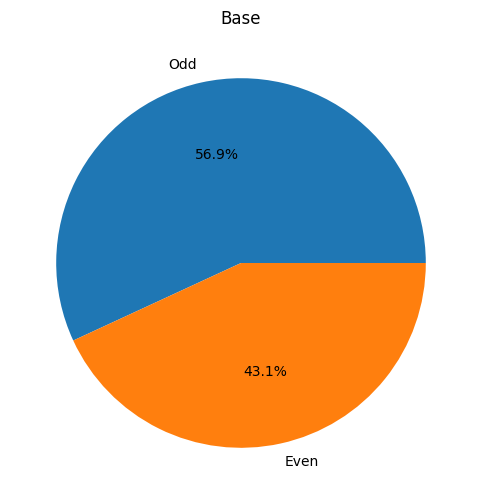

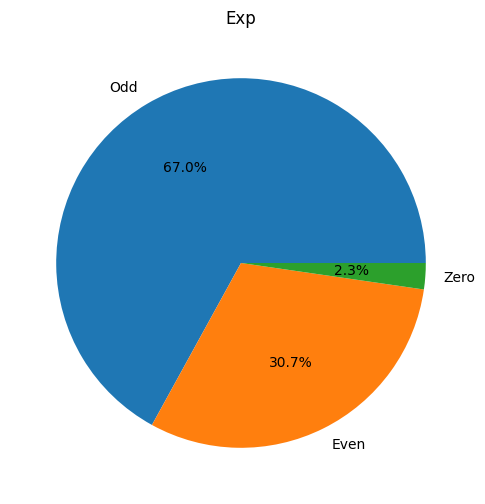

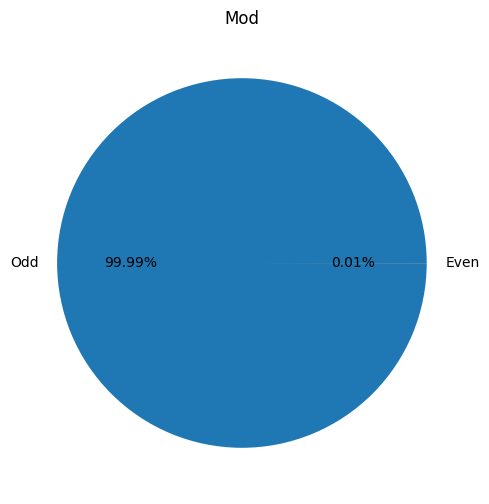

In [23]:
fig1, b_ax1 = plt.subplots(figsize=(6,6))
plt.title('Base')
b_ax1.pie(x=b_percentages.values, labels=['Odd','Even'], autopct='%1.1f%%')

fig2, e_ax1 = plt.subplots(figsize=(6,6))
plt.title('Exp')
e_ax1.pie(x=e_percentages.values, labels=['Odd','Even', 'Zero'], autopct='%1.1f%%')

fig3, m_ax1 = plt.subplots(figsize=(6,6))
plt.title('Mod')
m_ax1.pie(x=m_percentages.values, labels=['Odd','Even'], autopct='%1.2f%%')

### Base vs Mod

- NO record was found where `Base > Mod`.
- ONLY 265 (`0.01%`) records were found where `Base == Mod`

In [24]:
i_df = i_df.fillna('')
values = i_df['base_ge_mod'].value_counts()
values

base_ge_mod
     2331076
x        265
Name: count, dtype: int64

In [25]:
percentages = (values/values.sum()).mul(100).round(decimals=2)
percentages

base_ge_mod
     99.99
x     0.01
Name: count, dtype: float64

### 